# Experiment parameters

In [1]:
import sys
sys.path.append("../")
import numpy as np
import scipy as sp
from utils import (
    grid_adj_mat,
    grid_gos_mat,
    ring_adj_mat,
    ring_gos_mat,
    star_adj_mat,
    star_gos_mat,
)

In [37]:
datasets = ["a7a"] #[a7a", "a9a", "w7a", "w8a", "phishing"]
# max number of iterations for finding saddle with extragradient
num_iter_solution = 50000#500000

# max time for finding saddle with extragradient
max_time_solution = 3600
# tolerance of solution obtained with extragradient
tolerance_solution = 1e-10
# required accuracy of sliding
eps = 1e-10
seed = 30

In [3]:
# number of nodes
num_nodes = 25
# for grid graph
width = int(np.sqrt(num_nodes))  
regcoef_x = 2.0
regcoef_y = 2.0
r_x = 5.0
r_y = 0.0
comm_budget_experiment = 1000

In [4]:
from decentralized.network import Network, NetworkConfigManager

In [5]:
network = Network(
    comm_budget_experiment,
    num_nodes,
    "mix_mat",
    NetworkConfigManager("experiment/configs/network.yaml"),
)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/michael/Documents/DistributedOpt/opt_distr_stoch_vi_varying/decentralized/../decentralized/network/network.py:138: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G, nodelist=self.nodelist).toarray()


# Dataset

In [6]:
from libsvmdata import fetch_libsvm

In [7]:
A, b = fetch_libsvm(datasets[0])
if sp.sparse.issparse(A):
    A = A.toarray()

In [8]:
A.shape

(16100, 123)

In [9]:
from decentralized.oracles import ArrayPair

In [10]:
z_0 = ArrayPair.zeros(A.shape[1])

# Oracles

In [11]:
from utils import get_oracles

In [12]:
oracles, oracle_mean, L, delta, mu, A_grad, b_grad = get_oracles(
    A,
    b,
    num_nodes,
    regcoef_x,
    regcoef_y,
    r_x,
    r_y,
)

L = 54.000, delta = 3.062, mu = 2.000


# Run

## Solving linear regression

In [13]:
# x = np.linalg.inv(A_theor) @ b_theor
# x = np.linalg.solve(A_grad, b_grad)

In [14]:
x = np.linalg.lstsq(A_grad, b_grad, rcond=None)[0]

In [15]:
np.linalg.norm(x)

1.7806311083423514

In [16]:
z_true = ArrayPair(x, np.zeros(A.shape[1]))

In [17]:
z_true.x

array([-0.15866712, -0.16154333, -0.01363321,  0.07846524,  0.05307464,
        0.10053642, -0.04040208,  0.23082448,  0.24909823,  0.05252727,
        0.00848861, -0.40941521,  0.14304565, -0.09161828, -0.02566041,
       -0.04572812, -0.01829476, -0.0210022 , -0.2081542 , -0.07055014,
        0.03127643, -0.11329946,  0.16164484, -0.07795696, -0.02258644,
       -0.0909147 , -0.13553561,  0.08203256, -0.04729441, -0.1468533 ,
       -0.0110492 ,  0.27113665, -0.14911531, -0.15265011, -0.26890386,
       -0.11329946, -0.07055014, -0.05712835,  0.30757804,  0.11721456,
       -0.18237306, -0.14662593, -0.12288245, -0.10938847, -0.06024942,
        0.21517089,  0.14288531, -0.05870323, -0.04560505,  0.05798946,
        0.22320209,  0.09808518, -0.11087549, -0.09074427, -0.00258279,
       -0.1981093 , -0.09293478,  0.01127542,  0.17450591, -0.22063611,
        0.28710878, -0.1186307 ,  0.08261006, -0.19356367, -0.1297328 ,
       -0.17351051, -0.01763393,  0.04701246, -0.07149717, -0.12

In [18]:
g_true = ArrayPair(
    np.zeros((num_nodes, z_true.x.shape[0])), np.zeros((num_nodes, z_true.y.shape[0]))
)

## Centralized Extragradient

In [38]:
from utils import solve_with_extragradient_real_data

In [39]:
z_true = solve_with_extragradient_real_data(
    A=A,
    b=b,
    regcoef_x=regcoef_x,
    regcoef_y=regcoef_y,
    r_x=r_x,
    r_y=r_y,
    num_iter=num_iter_solution,
    max_time=max_time_solution,
    tolerance=tolerance_solution,
)

L = 54.000
Solving with extragradient...
argument_primal_value can be accessed at corresponding logger class fields.
steps performed: 1
time elapsed: 0:03:00.295388
grad norm: 2.8753e-02


In [40]:
z_true.x

array([-4.38547962e-02, -2.28753537e-02, -4.64225104e-03,  6.56845103e-03,
       -6.95219006e-04, -5.18709034e-02, -5.30572803e-03,  6.20024512e-03,
        1.85622284e-03, -2.13401568e-03, -2.41174063e-03, -8.28280118e-05,
       -4.70874080e-05, -1.57376556e-02, -1.05127454e-02, -1.26315474e-02,
       -1.33984522e-02, -1.32187683e-02,  1.08452141e-02, -2.22279114e-02,
       -7.97425371e-03, -3.90363951e-02,  5.75220011e-03, -2.70576656e-03,
       -1.70654186e-03, -3.93863712e-03, -4.51816764e-03, -2.79715785e-03,
        9.52548001e-03, -1.50840038e-03, -6.30417544e-03,  4.71748165e-03,
       -3.03910263e-03, -5.83035102e-04, -3.06629299e-02, -3.90363951e-02,
       -2.22279114e-02, -4.41230842e-03,  3.08403759e-02,  3.97139944e-02,
       -2.41505631e-02, -6.59640490e-02, -6.75864642e-03, -5.85837249e-03,
       -2.55484175e-03,  7.33094404e-05, -3.09842356e-06, -1.04864046e-02,
       -2.14744720e-02, -4.35711559e-03,  1.60075414e-02,  1.19417331e-02,
       -8.76123529e-03, -

## Decentralized Extragradient method

In [41]:
from experiment import run_extragrad_gt

In [44]:
extragrad = run_extragrad_gt(
    oracles=oracles,
    L=L,
    mu=mu,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    network=network,
    r_x=r_x,
    r_y=r_y,
    comm_budget_experiment=comm_budget_experiment,
)

Running decentralized extragradient...
argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.


## Decentralized Extragradient method with consensus subroutine

In [45]:
from experiment import run_extragrad_con

In [46]:
network.current_state = 0

In [47]:
extragrad_con = run_extragrad_con(
    oracles=oracles,
    L=L,
    mu=mu,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    network=network,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    comm_budget_experiment=comm_budget_experiment,
)

Running decentralized extragradient-con...
T_consensus = 746890813


KeyboardInterrupt: 

## Decentralized gradient sliding

In [48]:
from experiment import run_sliding

In [49]:
network.current_state = 0

In [50]:
sliding = run_sliding(
    oracles=oracles,
    L=L,
    delta=delta,
    mu=mu,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    network=network,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    comm_budget_experiment=comm_budget_experiment,
)

Running decentralized sliding...
H_0 = 1069883567, H_1 = 1028395764, T_subproblem = 6


KeyboardInterrupt: 

## Decentralized Algorithm 1

In [ ]:
from experiment import run_vi_papc

In [ ]:
network.current_state = 0
network.matrix_type = "gos_mat"

In [ ]:
vi_papc = run_vi_papc(
    num_nodes=num_nodes,
    oracles=oracles,
    L=L,
    mu=mu,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    network=network,
    r_x=r_x,
    r_y=r_y,
    comm_budget_experiment=comm_budget_experiment,
)

## Decentralized Alogorithm 2

In [ ]:
from experiment import run_vi_adom

In [ ]:
network.current_state = 0
network.matrix_type = "gos_mat"

In [ ]:
batch_size = len(oracles)
L_avg = L

In [ ]:
x_0 = ArrayPair.zeros(A.shape[1])
y_0 = ArrayPair.zeros(A.shape[1])        

In [ ]:
vi_adom = run_vi_adom(
    num_nodes=num_nodes,
    oracles=oracles,
    b=batch_size,
    L=L,
    L_avg=L_avg,
    mu=mu,
    x_0=x_0,
    y_0=y_0,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    network=network,
    r_x=r_x,
    r_y=r_y,
    comm_budget_experiment=comm_budget_experiment,
)

# Preplot

In [32]:
from experiment import preplot_algorithms

In [33]:
#labels = ['EGD-GT', 'EGD-CON', 'Sliding', 'Alg.1']
labels = ['EGD-GT', 'EGD-CON', 'Sliding', 'Alg.2']

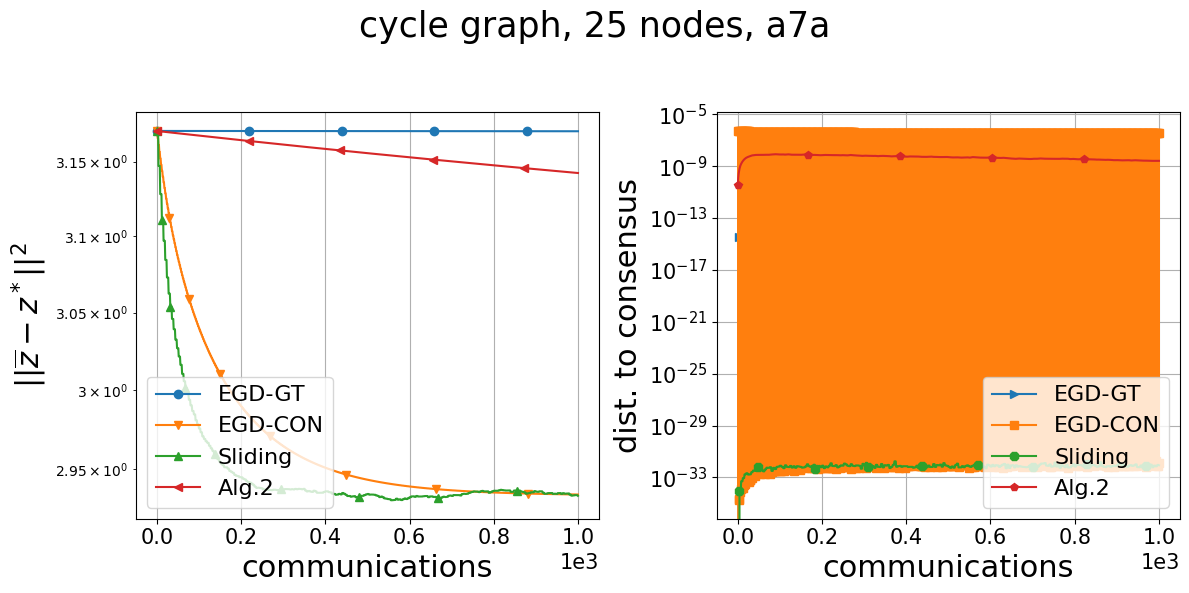

In [34]:
preplot_algorithms(
    topology="cycle",
    num_nodes=num_nodes,
    data=datasets[0],
    labels=labels,
    #runners=[extragrad, extragrad_con, sliding, vi_papc],
    runners=[extragrad, extragrad_con, sliding, vi_adom],
    dist_to_opt_type="argument",
)

# Save

In [ ]:
from experiment import save_algorithms

In [ ]:
#method_names = ['extragrad', 'extragrad_con', 'sliding', 'vi_papc']
method_names = ['extragrad', 'extragrad_con', 'sliding', 'vi_adom']

In [ ]:
save_algorithms(
    topology=graph,
    num_nodes=num_nodes,
    data=datasets[0],
    #methods=[extragrad, extragrad_con, sliding, vi_papc],
    methods=[extragrad, extragrad_con, sliding, vi_adom],
    method_names=[f"{method_name}.pkl" for method_name in method_names],
    z_true=z_true,
    experiment_type="real",
)

# Plot

In [ ]:
from experiment import plot_algorithms

In [ ]:
plot_algorithms(
    topology=graph,
    num_nodes=num_nodes,
    data=datasets[0],
    labels=labels,
    method_names=method_names,
    comm_budget_experiment=comm_budget_experiment,
)

# Experiment

In [ ]:
from experiment import run_experiment

In [ ]:
from typing import Tuple

def get_A_b(data: str) -> Tuple[np.ndarray, np.ndarray]:
    A, b = fetch_libsvm(data)
    if sp.sparse.issparse(A):
        A = A.toarray()
    
    return A, b

In [ ]:
methods = ["extragrad", "extragrad_con", "sliding", "vi_papc"]

In [ ]:
topologies = ["ring"]#["star", "grid", "ring"]

In [ ]:
run_experiment(
    methods=methods,
    topologies=topologies,
    datasets=datasets,
    adj_mat=adj_mat,
    gos_mat=gos_mat,
    num_nodes=num_nodes,
    labels=labels,
    regcoef_x=regcoef_x,
    regcoef_y=regcoef_y,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    num_iter_solution=num_iter_solution,
    max_time_solution=max_time_solution,
    tolerance_solution=tolerance_solution,
    comm_budget_experiment=comm_budget_experiment,
    experiment_type="real",
    get_A_b=get_A_b,
)

# Optimal Parameter Search

In [ ]:
from experiment import run_parameter_search

In [ ]:
run_parameter_search(
    methods=methods,
    topologies=topologies,
    datasets=datasets,
    adj_mat=adj_mat,
    gos_mat=gos_mat,
    num_nodes=num_nodes,
    labels=labels,
    regcoef_x=regcoef_x,
    regcoef_y=regcoef_y,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    comm_budget_experiment=comm_budget_experiment,
    experiment_type="real",
    get_A_b=get_A_b,
    stepsize_factors=[3.0, 0.1, 0.01, 0.001]
)